[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/Machine-Learning/blob/master/Notebooks/Module_2/Introduccion_PreProcesamientoWoAns.ipynb)

# Introducción al Pre-procesamiento 

<img src="http://tanukamandal.com/wp-content/uploads/2018/05/data-preparation-1-570x350.png" width="800" align="middle">

---



## Contenido de la sección


1.   Introducción al Pre-procesamiento de Datos
          1.1. Tipos de PP.
2.   Exploración Visual de los Datos
          2.1. Histogramas.
            2.1.1. Joyplot
          2.2. Diagramas de Dispersión.

### Literatura recomendada:

1. García, S., Luengo, J., & Herrera, F. (2015). Data preprocessing in data mining (pp. 195-243). Cham, Switzerland: Springer International Publishing.

---

### Introducción al Pre-procesamiento (PP) de Datos.

El **preprocesamiento** de datos dentro de la Ciencia de Datos es FUNDAMENTAL. 

Según el Foro Económico Mundial, **¡para 2025 generaremos alrededor de 463 exabytes ($463*10^{18}$ bytes = 463 milliones de TB) de datos a nivel mundial por día!**. Entonces, deberiamos preguntarnos

 * ¿Todos los datos son adecuados para ser utilizados por los algoritmos de aprendizaje automático?
 * ¿Cómo decidimos eso?

El **preprocesamiento** es el primer paso a realizarse antes de comenzar a aprender cualquier tipo de modelo, ya que la calidad de los datos y la información útil que puede derivarse de estos afectará directamente la capacidad de nuestros modelos.

* **Garbage In, Garbage Out**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Data_visualization_process_v1.png/525px-Data_visualization_process_v1.png)

Tomado de: https://www.kdnuggets.com/2016/03/data-science-process.html


---
### Entonces, ¿qué es el PP de datos?

Cuando hablamos de datos, generalmente pensamos en conjuntos de datos en **forma  tabular o tablas de excel** (filas y columnas) con valores que una computadora es capáz de asimilar (números continuos) y sin datos faltantes.  Por ejemplo, consideremos un conjunto de datos de aprobación crediticia.
Dicho conjunto consta de:

650 clientes (filas), 15 variables explicativas (nominales/categóricas y númericas) así como una clase (en total 16 columnas).

* pregunta: **¿Una computadora puede analizar variables nominales?**

* En el caso negativo, **¿cómo podriamos convertir la variable para que la computadora pueda interpretarla?**

* **¿Qué se debe hacer cuando una variable presenta un dato faltante?**


In [63]:
import pandas as pd
#from google.colab import data_table

url = 'https://raw.githubusercontent.com/MauricioRR-Tec/Machine-Learning/master/Notebooks/Module_2/Datasets/creditApproval_dataset.csv'
df1 = pd.read_csv(url)

#data_table.DataTable(df1, include_index=True, num_rows_per_page=10)
#data_table.DataTable? #How to display help regarding a function
df1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


### ¿Cómo identificarían si una variable, por ejemplo **A4** tiene valores faltantes?

In [64]:
### Here your answer...
nadf = df1['A4'][df1['A4']=='?']
nadfarr = df1['A4']=='?'
print(nadf)
print(nadfarr)
print(nadf.index)
## Mostrar en pantalla
# ['u' 'y' '?' 'l'] 
# [False False  True False]
#[206, 270, 330, 456, 592, 622] indices en donde se encuentran

206    ?
270    ?
330    ?
456    ?
592    ?
622    ?
Name: A4, dtype: object
0      False
1      False
2      False
3      False
4      False
       ...  
685    False
686    False
687    False
688    False
689    False
Name: A4, Length: 690, dtype: bool
Int64Index([206, 270, 330, 456, 592, 622], dtype='int64')


---
Si bien mucha información se encuentra en un formato tabular o algún otro compatible, no siempre es el caso. 
Los **datos pueden tener muchas formas diferentes: 
tablas estructuradas, imágenes, archivos de audio, videos, etc**.

Las máquinas no entienden los datos de texto, imagen o video **tal como son**, entienden los 1 y los 0. Por lo tanto, no es suficiente con hacer una presentación de diapositivas de todas nuestras imágenes y esperar que nuestro modelo de aprendizaje automático se entrene solo con eso.

![](https://imgs.xkcd.com/comics/machine_learning.png)

#### Por ejemplo, en el caso de una imagen correspondiente al dígito **6** escrito a mano

#### ¿Cómo podemos representarla para que una máquina entienda una imagen?

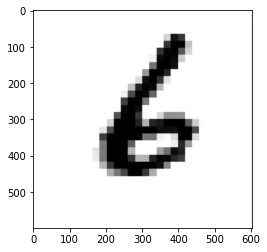

In [65]:
from matplotlib import image as img
from matplotlib import pyplot as plt

image = img.imread("https://i.stack.imgur.com/Ds5Rc.png")

plt.imshow(image)

Representamos la imagen en una matriz, o mejor dicho, varias matrices correspondientes a la escala de colores en Rojo, Verde y Azul (RGB por sus siglas en inglés). Por lo tanto, una imagen corresponde a 3 matrices $z_i\in Z$, de tamaño $m\times n$.

In [66]:
print(type(image)) #El objeto devuelto es un arreglo multidimensional MxNxD
print(image.shape) #Funciones de numpy.ndarray, devuelve el tamaño del arreglo.
print(image)

<class 'numpy.ndarray'>
(599, 602, 3)
[[[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.9647059  0.9647059  0.9647059 ]
  [0.93333334 0.93333334 0.93333334]
  [0.8784314  0.8784314  0.8784314 ]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.972549   0.972549   0.972549  ]
  [0.93333334 0.93333334 0.93333334]
  [0.8784314  0.8784314  0.8784314 ]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.93333334 0.93333334 0.93333334]
  [0.88235295 0.88235295 0.88235295]]

 ...

 [[0.96862745 0.96862745 0.96862745]
  [0.9764706  0.9764706  0.9764706 ]
  [0.99215686 0.99215686 0.99215686]
  ...
  [1.         1.         1.        ]
  [0.9882353  0.9843137  0.9882353 ]
  [0.827451   0.827451   0.827451  ]]

 [[0.96862745 0.96862745 0.96862745]

---
### ¿Cuáles son los problemas básicos que deben resolverse en el PP de datos?

> En cualquier proceso de Machine Learning, **el PP es el paso en el que los datos se transforman o codifican** para llevarlos a un estado tal que ahora la máquina pueda analizarlos fácilmente. 

Estos son algunos de los tipos de problemas básicos así como la familia de técnicas de PP a la que pertenecen:
* ¿Cómo limpio los datos? ***Limpieza de datos***.
* ¿Cómo unifico y escalo los datos? ***Normalización de datos***.
* ¿Cómo proporciono datos precisos? ***Transformación de datos***.
* ¿Cómo manejo los datos faltantes? ***Imputación de datos perdidos***.
* ¿Cómo incorporo y ajusto datos? ***Integración de datos***.
* ¿Cómo detecto y manejo el ruido? ***Análisis del ruido***.

![](https://docs.google.com/uc?export=download&id=1-Dro_Qk1I63w2OAtjrFXRN2HcXMC07lo)

---
#### a.1. Limpieza de Datos.

Involucra operaciones como
* **corrección** de datos 
* **filtrar datos** especificios o incorrectos 
* **reducir detalles** innecesarios. 

Es un concepto general que se traslapa con otras técnicas de PP como la imputación de datos faltantes y análisis del ruido (aunque ambas categorías se ven por separado para un análisis más profundo). 

Otras operaciones son 
* la **detección de discrepancias** y **datos sucios** (fragmentos de los datos originales que no tienen sentido). 

Esto típicamente requiere intervención humana ya que es necesaria la comprensión de los datos originales.

#### Ejemplo:

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

![](https://docs.google.com/uc?export=download&id=1SY3zCno1dL3qukcBjWz8xIa7gkfbqm7D)

<!-- <img src="https://docs.google.com/uc?export=download&id=1SY3zCno1dL3qukcBjWz8xIa7gkfbqm7D" width="800" align="middle"> -->


In [67]:
import pandas as pd
#from google.colab import data_table

url = 'https://raw.githubusercontent.com/MauricioRR-Tec/Machine-Learning/master/Notebooks/Module_2/Datasets/creditApproval_dataset.csv'
df = pd.read_csv(url)

#data_table.DataTable(df1, include_index=True, num_rows_per_page=10)
#data_table.DataTable? #How to display help regarding a function
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


### Ejercicio:

1. Ahora queremos remover (por alguna razón) los registros de la matriz donde la variable A4 == 'u'

2. También podriamos querer acotarnos a un rango de valores, por ejemplo para la
variable 'A3' entre 4 y 10

3. En particular, queremos cambiar el valor de la columna ``class`` de $\{-,+\}$ a $\{-1,1\}$

In [68]:
#Ahora queremos remover (por alguna razón) los registros de la matriz donde
#la variable A4 == 'u'
#Here your answer
df2 = df1[df1['A4']!='u']
#También podriamos querer acotarnos a un rango de valores, por ejemplo para la
#variable 'A3' entre 4 y 10
#Here your answer
df2 = df2[(df2['A3']>=4)&(df2['A3']<=10)]
#Queremos cambiar el valor de la columna class de {−,+} a {−1,1}
#Here your answer
df2.replace({'+':1, '-':-1}, inplace = True)
df2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
9,b,42.5,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,1
15,b,36.67,4.415,y,p,k,v,0.250,t,t,10,t,g,320,0,1
74,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,160,2,-1
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,0,0,-1
104,b,27.83,4.000,y,p,i,h,5.750,t,t,2,t,g,75,0,-1
147,a,40.33,7.540,y,p,q,h,8.000,t,t,14,f,g,0,2300,1
194,b,34.5,4.040,y,p,i,bb,8.500,t,t,7,t,g,195,0,1
195,b,28.25,5.040,y,p,c,bb,1.500,t,t,8,t,g,144,7,1
211,b,24.33,6.625,y,p,d,v,5.500,t,f,0,t,s,100,0,1
219,a,18.92,9.250,y,p,c,v,1.000,t,t,4,t,g,80,500,1


---
#### a.2. Normalización de los Datos.

La unidad de medida utilizada puede afectar el análisis de datos.

>> Por ejemplo: típicamente los datos atmosféricos en Cuernavaca, reflejan una  temperatura acotada entre 8 a 40 °C, mientras que la presión atmosférica esta data entre 950 a 1050 mbar. 
>> <img src="https://upload.wikimedia.org/wikipedia/commons/9/9e/Dosen-barometer.jpg" width="400">
>> 
>> * ¿Qué variable predomina más? 
>> * ¿Qué cambio produce un mayor efecto, una diferencia de 5°C de temperatura o 20 mbar de presión?

La normalización de los datos intenta dar a todos los atributos el mismo peso, expresando cada variable en las mismas unidades de medida y así como una escala en común (determinada).

#### Ejercicio:

1. Escalar los valores de las columnas A3 y A15 entre 0 y 1.

Utilice la siguiente formula:

$$x_{new} = \frac{x-a}{b-a}$$

tal que

$$a=\min(x),\ b=\max(x)$$

2. Escalar las mismas columnas pero entre dos valores arbitrarios $q$ y $z$, tal que $q<z$.

Utilice la siguiente formula:

$$x_{qz}= (z-q)\cdot x_{new}+q$$


In [72]:
import pandas as pd
#from google.colab import data_table

url = 'https://raw.githubusercontent.com/MauricioRR-Tec/Machine-Learning/master/Notebooks/Module_2/Datasets/creditApproval_dataset.csv'
df = pd.read_csv(url)
#Your answer here
df['A3']=scale(df['A3'])
df['A15']=scale(df['A15'])
df['A3']=scale2(df['A3'],3,4)
df['A15']=scale2(df['A15'],3,4)
#valor maximo... indice en donde se encuentra dicho valor..
print(df)
print(df['A3'].idxmax())
print(df['A15'].idxmax())

    A1     A2        A3 A4 A5  A6  A7  ...  A10 A11 A12  A13  A14      A15 class
0    b  30.83  3.000000  u  g   w   v  ...    t   1   f    g  202  3.00000     +
1    a  58.67  3.159286  u  g   q   h  ...    t   6   f    g   43  3.00560     +
2    a   24.5  3.017857  u  g   q   h  ...    f   0   f    g  280  3.00824     +
3    b  27.83  3.055000  u  g   w   v  ...    t   5   t    g  100  3.00003     +
4    b  20.17  3.200893  u  g   w   v  ...    f   0   f    s  120  3.00000     +
..  ..    ...       ... .. ..  ..  ..  ...  ...  ..  ..  ...  ...      ...   ...
685  b  21.08  3.360179  y  p   e   h  ...    f   0   f    g  260  3.00000     -
686  a  22.67  3.026786  u  g   c   v  ...    t   2   t    g  200  3.00394     -
687  a  25.25  3.482143  y  p  ff  ff  ...    t   1   t    g  200  3.00001     -
688  b  17.92  3.007321  u  g  aa   v  ...    f   0   f    g  280  3.00750     -
689  b     35  3.120536  u  g   c   h  ...    f   0   t    g    0  3.00000     -

[690 rows x 16 columns]
44


In [69]:
#Usar
def scale(x):
    tmp_min = x.min()
    tmp_max = x.max()
    x_new = (x - tmp_min)/(tmp_max - tmp_min)
    return x_new

#En esta sección escalaremos los valores usando minimos y maximos

In [71]:
#Usar
def scale2(x,q,z):
    tmp_min = x.min()
    tmp_max = x.max()
    x_new = (z-q)*((x - tmp_min)/(tmp_max - tmp_min))+q
    return x_new

#Mientras que en esta sección escalaremos los valores usando valores especificos

---
#### a.3. Transformación de Datos

En este paso los datos se **convierten o consolidan** para que el resultado del modelado sea más *eficiente/efectivo*. 

Entre las técnicas de transformación de datos se encuentra
* el **suavizamiento**.
    * <img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/12/Zoomed-Moving-Average-Transform.png" width="500">
* **construcción de características**.
![](https://docs.google.com/uc?export=download&id=1a4zaszYOY3Rc7YX5Ggo1gBykOz_nwnML)
* **agregación o resumen** de datos.
* **discretización**.
* **generalización**. 

Sin embargo, la mayoría de estas se pueden considerar como áreas independientes.

Las tareas que requieren supervisión humana son las técnicas clásicas de transformación de datos como: 
* la generación de informes
* nuevos atributos que agregan los existentes 
* generalización de conceptos, especialmente en atributos categóricos
    * ej. la sustitución de fechas completas por solo números de año.

#### Ejercicio: One-Hot Encoding

One-Hot Encoding es la transformación de variables nominales/categóricas en númericas. Esta transformación consiste en convertir cada valor $v_i$ de una variable $V$ ($v_i\in V$), en columnas. De tal suerte, que si la variable $V$ tiene tres valores ($|V|=3$), esta será reemplazada por V1, V2 y V3, en donde se pondrá un 1 si $V1 = v_i$, de otra forma 0; se aplica el mismo principio para V2 y V3.

![](https://docs.google.com/uc?export=download&id=18CttdKmICOmEvQ82JEJwQbdnxO3myjnU)

Por ejemplo, si tenemos ``df.A1=['red', 'red', 'green']``

Cada valor de A1 se representara por un vector de 0's y 1's. Esto es ``[1,0],[1,0],[0,1]``. 

Ahora, en lugar de tener ``df.A1``, tenemos ``df.A1_red,df.A1_ref``.

**Actividad**: Explicar el One-Hot-Encoding a las variables A4 y A5 del conjunto de aprobación de crédito.

In [73]:
#Nota: get dummies ayuda a?
pd.get_dummies(pd.Series(list('?')))

,?
0,1


In [74]:
import pandas as pd
#from google.colab import data_table

url = 'https://raw.githubusercontent.com/MauricioRR-Tec/Machine-Learning/master/Notebooks/Module_2/Datasets/creditApproval_dataset.csv'
df = pd.read_csv(url)

# With Pandas is too easy
cat_columns = ["A4"]
df_processed = pd.get_dummies(df, prefix_sep="_",
                             columns=cat_columns)

print(df_processed)
#data_table.DataTable(df_processed, include_index=True, num_rows_per_page=10)

#With pandas but step by step
print(df.A4.dtype)
df['A4'] = pd.Categorical(df['A4']) # cast our categorical variable into the built-in pandas Categorical data type
print(df.A4.dtype)
dfDummies = pd.get_dummies(df['A4'], prefix = 'A4x')
df = pd.concat([df, dfDummies], axis=1)
df = df.drop(['A4'], axis=1)

print(df)
#data_table.DataTable(df, include_index=True, num_rows_per_page=10)

    A1     A2      A3 A5  A6  A7    A8  ...  A14  A15  class A4_? A4_l A4_u  A4_y
0    b  30.83   0.000  g   w   v  1.25  ...  202    0      +    0    0    1     0
1    a  58.67   4.460  g   q   h  3.04  ...   43  560      +    0    0    1     0
2    a   24.5   0.500  g   q   h  1.50  ...  280  824      +    0    0    1     0
3    b  27.83   1.540  g   w   v  3.75  ...  100    3      +    0    0    1     0
4    b  20.17   5.625  g   w   v  1.71  ...  120    0      +    0    0    1     0
..  ..    ...     ... ..  ..  ..   ...  ...  ...  ...    ...  ...  ...  ...   ...
685  b  21.08  10.085  p   e   h  1.25  ...  260    0      -    0    0    0     1
686  a  22.67   0.750  g   c   v  2.00  ...  200  394      -    0    0    1     0
687  a  25.25  13.500  p  ff  ff  2.00  ...  200    1      -    0    0    0     1
688  b  17.92   0.205  g  aa   v  0.04  ...  280  750      -    0    0    1     0
689  b     35   3.375  g   c   h  8.29  ...    0    0      -    0    0    1     0

[690 rows x 19 

---
### a.4. Imputación de datos faltantes.

El propósito es llenar las variables que contienen **valores faltantes** (missing values en inglés) con algunos datos intuitivos. 

En la mayoría de los casos, es mejor agregar una estimación razonable de un valor de datos adecuado que dejarlo en blanco.

<img src="https://stefvanbuuren.name/fimd/fig/ch04-patterns-1.png" width="700">

Tomado de: https://stefvanbuuren.name/fimd/missing-data-pattern.html

---
### a.5. Integración de Datos.

Comprende la fusión de datos de múltiples fuentes de datos. 

Este proceso debe realizarse con cuidado para evitar redundancias e inconsistencias en el conjunto de datos resultante. 

Las operaciones típicas logradas dentro de la integración de datos son la 
* **identificación** y **unificación** de variables y dominios
* **análisis de correlación** entre atributos
* **identificación de duplicación** y **detección de conflictos** en los valores de datos de diferentes fuentes.

![](https://pandas.pydata.org/pandas-docs/stable/_images/merging_append2.png)

<!-- <img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_append2.png" width="700"> -->

#### Ejercicio:

Dada la pandemia desencadenada por el COVID19, deseamos entender mejor la  propagación del virus. Los datos por país se pueden consultar en el repositorio de github https://datahub.io/core/covid-19#data. Sin embargo, para nuestro análisis requerimos enfocarnos en los **casos confirmados acumulados por día y país**.

Para esto necesitamos en el eje $y$ (renglones) las fechas, y en el eje $x$ (columnas) los paises. **Realice las acciones de pivoteo necesarias para obtener el DataFrame requerido. La variable ``Date`` debe de ser de tipo fecha. Aseguresé de guardar los resultados en un archivo CSV para su posterior análisis.**

In [76]:
#Qué es lo que hace pivot_table?
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [77]:
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                    aggfunc={'D': np.sum,
                             'E': np.mean})
table

D         E
A   C                  
bar large  11  7.500000
    small  11  8.500000
foo large   4  4.500000
    small   7  4.333333

In [85]:
import pandas as pd
import numpy as np
#from google.colab import data_table
url = 'https://raw.githubusercontent.com/MauricioRR-Tec/Machine-Learning/master/Notebooks/Module_2/Datasets/covid19WW.csv'
df = pd.read_csv(url)
df

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,1/22/2020,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,1/23/2020,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,1/24/2020,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,1/25/2020,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,1/26/2020,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
33103,5/20/2020,Zimbabwe,NaN,-20.0,30.0,48.0,18.0,4.0
33104,5/21/2020,Zimbabwe,NaN,-20.0,30.0,51.0,18.0,4.0
33105,5/22/2020,Zimbabwe,NaN,-20.0,30.0,51.0,18.0,4.0
33106,5/23/2020,Zimbabwe,NaN,-20.0,30.0,56.0,18.0,4.0


In [86]:
#Your answer HeRe
df1 = df.set_index(['Country/Region', 'Date'], drop = True)['Confirmed']
df1

Country/Region  Date     
Afghanistan     1/22/2020     0.0
                1/23/2020     0.0
                1/24/2020     0.0
                1/25/2020     0.0
                1/26/2020     0.0
                             ... 
Zimbabwe        5/20/2020    48.0
                5/21/2020    51.0
                5/22/2020    51.0
                5/23/2020    56.0
                5/24/2020    56.0
Name: Confirmed, Length: 33108, dtype: float64

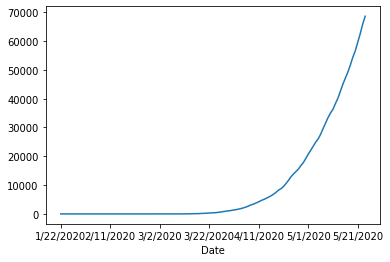

In [87]:
df1['Mexico'].plot()

In [101]:
#Html paths for csv files from John Hopkins - Confirmed / Death cases
confirmedPath = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deathsPath = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

df_Confirmed = pd.read_csv(confirmedPath, header=0, index_col=0, parse_dates=True, squeeze=True)
df_Confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_Confirmed = df_Confirmed.drop(["Lat","Long"],axis="columns")

df_Confirmed = df_Confirmed.set_index('Country')
df_Confirmed = df_Confirmed.stack()
df_Confirmed.index = df_Confirmed.index.rename('Date', level=1)
df_Confirmed.name = 'Confirmed'
df_Confirmed = df_Confirmed.reset_index()

df_Deaths = pd.read_csv(deathsPath, header=0, index_col=0, parse_dates=True, squeeze=True)
df_Deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
df_Deaths = df_Deaths.drop(["Lat","Long"],axis="columns")

df_Deaths = df_Deaths.set_index('Country')
df_Deaths = df_Deaths.stack()
df_Deaths.index = df_Deaths.index.rename('Date', level=1)
df_Deaths.name = 'Deaths'
df_Deaths = df_Deaths.reset_index()

In [109]:
#Your answer HeRe
dft = pd.merge(df_Confirmed, df_Deaths, how = 'outer')
dft = dft.set_index(['Country', 'Date'], drop = True)
dft
#Concatenar ambos dataframes, pivotear y plotear algo

Confirmed  Deaths
Country     Date                      
Afghanistan 1/22/20          0       0
            1/23/20          0       0
            1/24/20          0       0
            1/25/20          0       0
            1/26/20          0       0
...                        ...     ...
Zimbabwe    8/23/20       5930     155
            8/24/20       6070     155
            8/25/20       6196     166
            8/26/20       6251     179
            8/27/20       6292     189

[395514 rows x 2 columns]

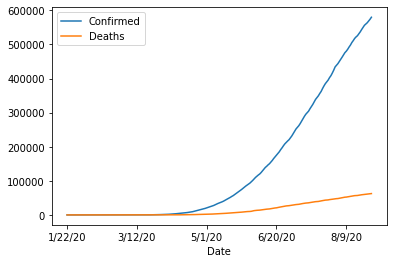

In [112]:
dft.xs('Mexico').plot()

---
### a.6. Identificación de Datos Anómalos/Outliers.

El objetivo principal es detectar errores aleatorios o variaciones en una variable medida. Tenga en cuenta que nos referimos a este proceso como  **identificación** de ruido en lugar de la **eliminación** de ruido. 

<img src="https://www.mdpi.com/energies/energies-12-03310/article_deploy/html/images/energies-12-03310-g002.png" width="600">

Una vez que se detecta un ejemplo ruidoso, podemos aplicar un proceso basado en la corrección que podría involucrar algún tipo de operación subyacente.

<img src="https://anomaly.io/wp-content/uploads/2017/01/correlation-anomaly-detected.png" width="800" align="middle">

---


### Otras actividades asociadas al PP: Reducción de Datos

La **reducción de datos** comprende el conjunto de técnicas que, de una forma u otra, obtienen una representación reducida de los datos originales.

El **objetivo** de la redución de los datos es ***encontrar un sub-conjunto $C'$ que se aproxime al conjunto original $C$ tal que la información contenida en $C' \approx C$***. Esto típicamente significa que se mantienen la estructura esencial de los datos originales ($C$), pero la cantidad de datos se reduce. 

<img src="https://docs.google.com/uc?export=download&id=1kJvqifJpTjT-3NjyUzdD-6EvYGPSHE3v" width="400" align="middle">

Algo interesante, es que mientras el PP es fundamental, la reducción de datos puede considerarse como *opcional*. Sin embargo, existen muchas razones por las cuales este proceso es más que una sugerencia:

* Para su ejecución y de acuerdo a formulación, todos los algoritmos de ML estan sujetos a un 
  * **tiempo de computo específico** 
  * **memoria** específica.
  * **tamaño del conjunto de datos** 
  * etc.

  Entonces, si el tamaño del conjunto de datos es mayor al limite de un algoritmo, el tiempo de computo se volverá **prohibitivo**.  

<img src="https://upload.wikimedia.org/wikipedia/commons/0/09/Binary_search_vs_Linear_search_example_svg.svg" width="300" style="background-color:white;">

* Respecto a la **memoria** y **tamaño del conjunto de datos**, estos se encuentra relacionados a la **Maldición de la Dimensionalidad** (Curse of Dimensionality en inglés).
La maldición de la dimensionalidad es una familia de fenómenos relacionados a aquellos problemas descritos por muchas dimensiones, lo que no sucede en aquellos sistemas de pocas dimensiones. 

    * Alta Dimensionalidad
        * Definición: ***Espacio de Características*** (Feature Space en inglés); determina todo el posible conjunto de combinaciones (realistas o no) de los valores que tendrán las variables del problema.

        Ahora supongamos que queremos realizar una predicción usando solo una dimensión que esta acotada entre 0 y 1, $X^D \mid D=1,\ 0\leq x_1 \leq 1$. En este caso, podemos conocer $1/3$ de todos los posibles resultados conociendo una tercera parte de la variable $x_1$, como se observa en la siguiente figura  <img src="https://docs.google.com/uc?export=download&id=1DCqkNuAH2Dc32HOz04aBBekn8nAk1zHH" width="600" style="background-color:white;">
        
        Si ahora utilizamos dos variables, $X^D \mid D=2, 0\leq x_1,\ x_2 \leq 1$, y dividimos ambas en 3 partes, podemos dibujar un cuadrado que cubra $1/3$ de los valores de cada variable en 3 partes. Sin embargo, este cuadrado, no cubre $1/3$ parte de todas las combinaciones de $x_1 \text{ y } x_2$, en cambio, ¡solo cubre $1/9 \sim 11 \text{\%}$ ! <img src="https://docs.google.com/uc?export=download&id=18wZ8GWiQNYnZMGvIKyAvSqyT1dfDE_lK" width="600" style="background-color:white;">

        Si añadimos una tercer variable y repetimos el mismo proceso, el cubo resultante solo cubrirá $1/27 \approx 4\text{\%}$ de todas las posibles combinaciones. <img src="https://docs.google.com/uc?export=download&id=1rBP3TXW2SjowCslJOEa9SN0RlOdwir90" width="600" style="background-color:white;">

        De hecho
        <img src="https://docs.google.com/uc?export=download&id=18hw5NcUSEKAZw9VJkZzH5-AjqcYWgl2L" width="600" style="background-color:white;">

<!--Por ejemplo, si el objetivo es reducir el número de dimensiones el objetivo estaría dado por  
$C'^D \approx C^F \mid F>D $. -->
